In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

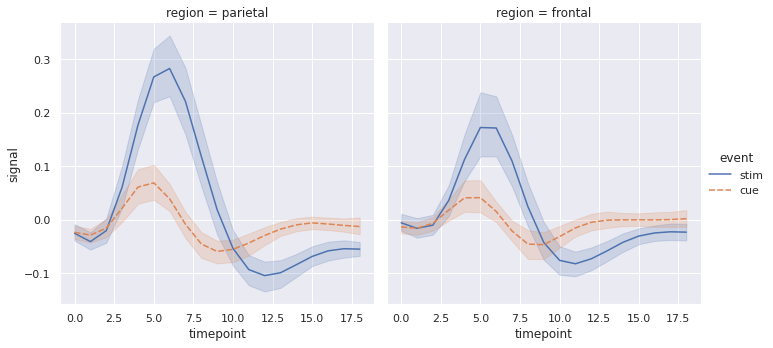

In [3]:
import seaborn as sns
sns.set_theme()
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

The confidence intervals are computed using bootstrapping, which can be time-intensive for larger datasets. It’s therefore possible to disable them:

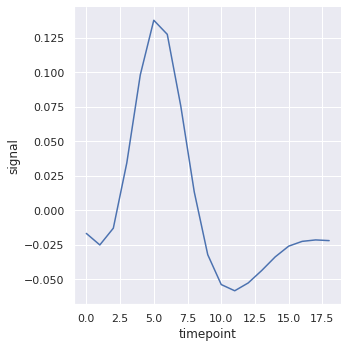

In [15]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar=None,
)

In [ ]:
Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plot
ting the standard deviation instead of a confidence interval:

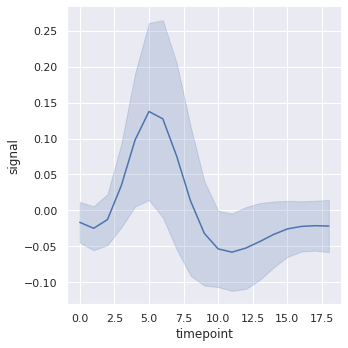

In [16]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", errorbar="sd",
)

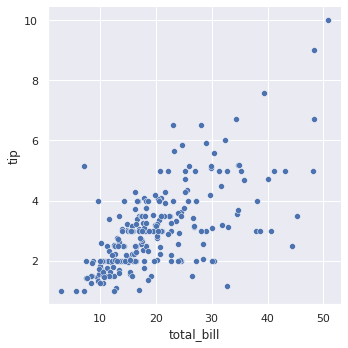

In [4]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")


While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

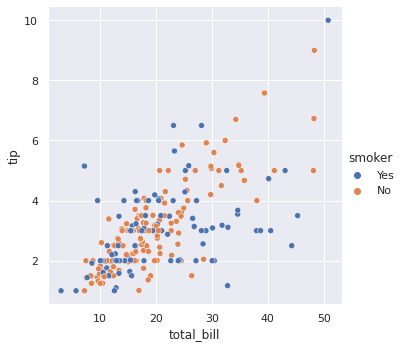

In [5]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker")

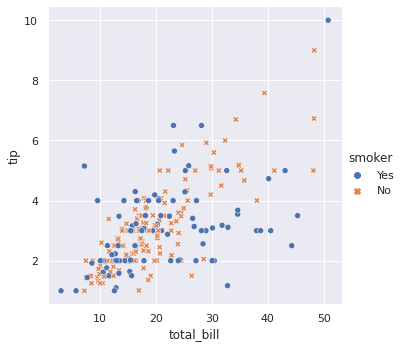

In [7]:
#To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

It’s also possible to represent four variables by changing the hue and style of each point independently. But this should be done carefully, because the eye is much less sensitive to shape than to color:

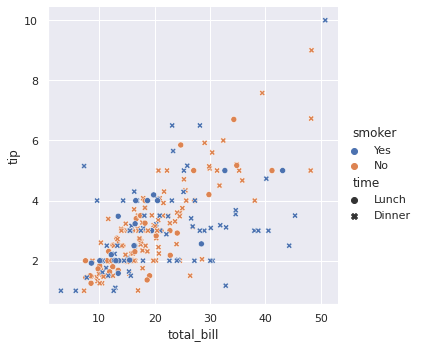

In [10]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="time",
)

In the examples above, the hue semantic was categorical, so the default qualitative palette was applied. If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette:

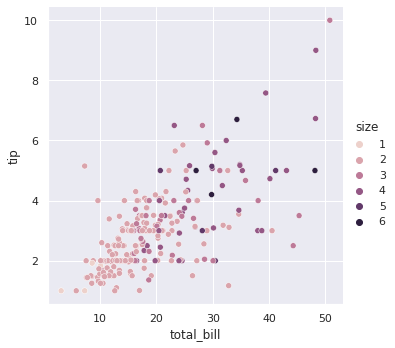

In [9]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

In both cases, you can customize the color palette. There are many options for doing so. Here, we customize a sequential palette using the string interface to cubehelix_palette():

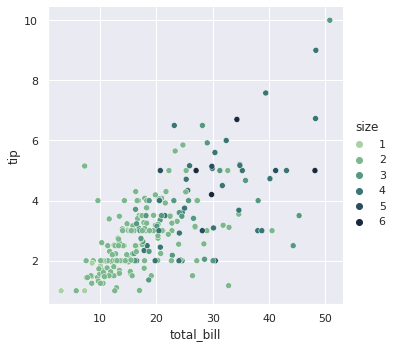

In [12]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip",
    hue="size", palette="ch:r=-.5,l=.75"
)


The third kind of semantic variable changes the size of each point:

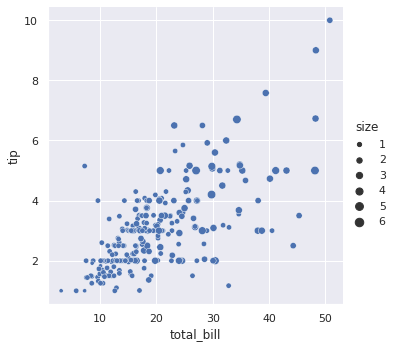

In [13]:
sns.relplot(data=tips, x="total_bill", y="tip", size="size")

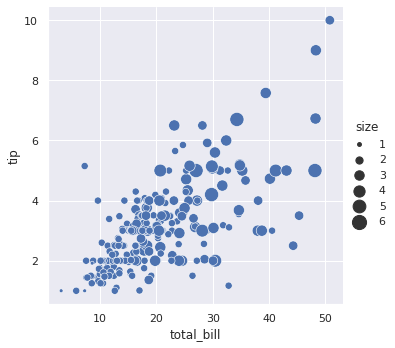

In [14]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

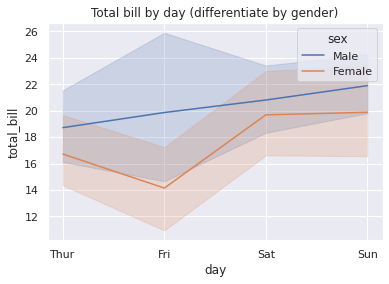

In [25]:
# Simple line plot
sns.lineplot(data=tips, x="day", y="total_bill", hue="sex")
plt.title('Total bill by day (differentiate by gender)')
plt.show()

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

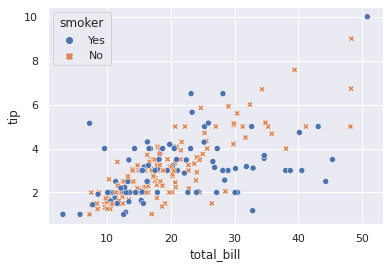

In [23]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker", style="smoker")

# Histogram

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

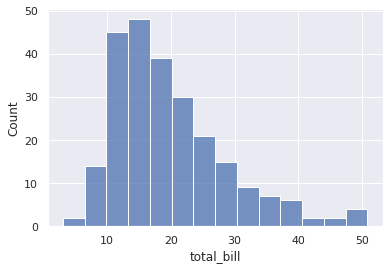

In [31]:
#Assign a variable to x to plot a univariate distribution along the x axis:
sns.histplot(data=tips, x="total_bill")

<AxesSubplot: xlabel='Count', ylabel='total_bill'>

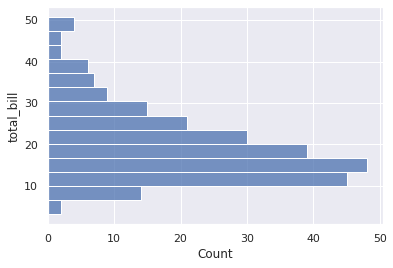

In [30]:
sns.histplot(data=tips, y="total_bill")

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

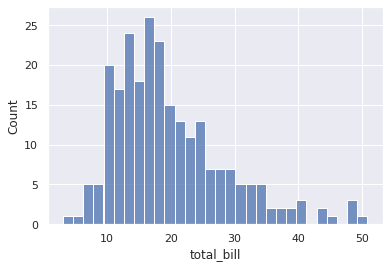

In [32]:
sns.histplot(data=tips, x="total_bill", bins=30)

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

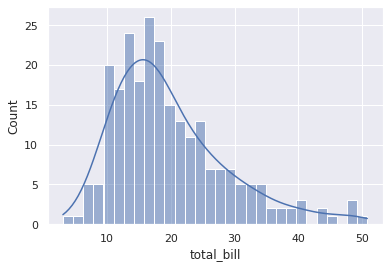

In [35]:
# Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:
sns.histplot(data=tips, x="total_bill", bins=30, kde=True)

If neither x nor y is assigned, the dataset is treated as wide-form, and a histogram is drawn for each numeric column:

<AxesSubplot: ylabel='Count'>

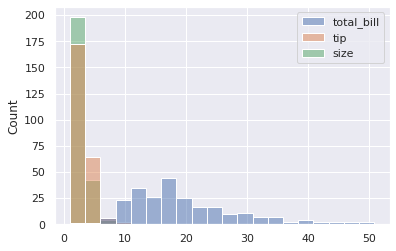

In [36]:
sns.histplot(data=tips)

You can otherwise draw multiple histograms from a long-form dataset with hue mapping:

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

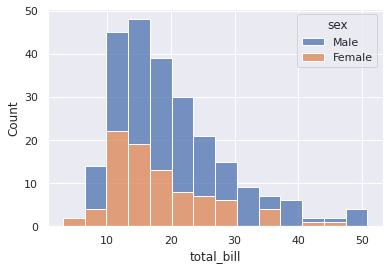

In [38]:
sns.histplot(data=tips, x="total_bill", hue="sex", multiple="stack")

Overlapping bars can be hard to visually resolve. A different approach would be to draw a step function:

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

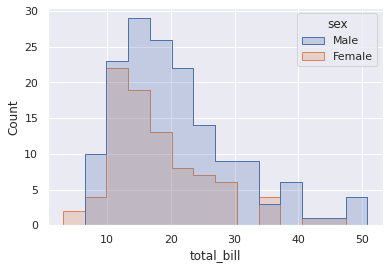

In [40]:
sns.histplot(tips, x="total_bill", hue="sex", element="step")

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

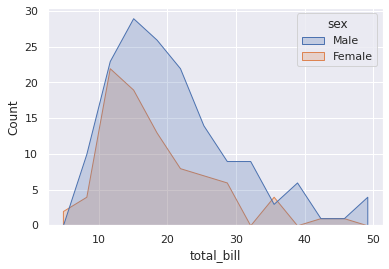

In [41]:
# You can move even farther away from bars by drawing a polygon with vertices in the center of each bin.
sns.histplot(tips, x="total_bill", hue="sex", element="poly")

It’s also possible to normalize so that each bar’s height shows a probability, proportion, or percent, which make more sense for discrete variables

<AxesSubplot: xlabel='size', ylabel='Percent'>

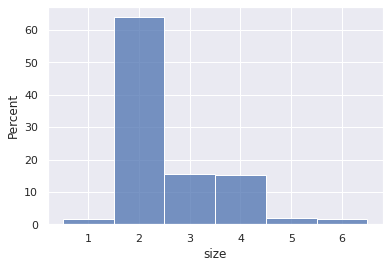

In [43]:
sns.histplot(data=tips, x="size", stat="percent", discrete=True)

# Box Plot

<AxesSubplot: >

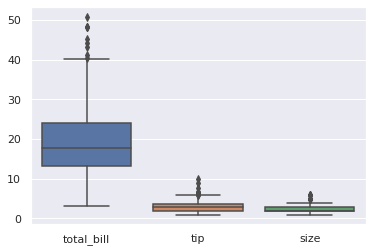

In [45]:
sns.boxplot(data= tips )

<AxesSubplot: xlabel='total_bill'>

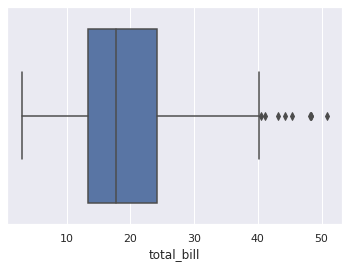

In [46]:
sns.boxplot(x=tips["total_bill"])

Group by a categorical variable, referencing columns in a dataframe:

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

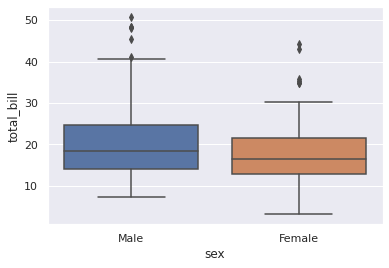

In [51]:
sns.boxplot(data=tips, x="sex", y="total_bill")

Draw a vertical boxplot with nested grouping by two variables:

<AxesSubplot: xlabel='day', ylabel='total_bill'>

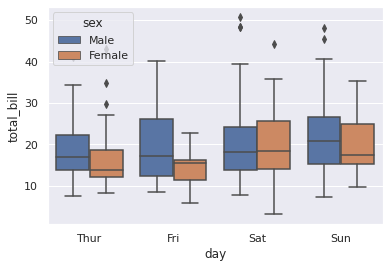

In [50]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex")

Draw the boxes as line art and add a small gap between them:

In [55]:
#sns.boxplot(data=tips, x="day", y="total_bill", hue="sex", fill=False, gap=.1)

## violin plot

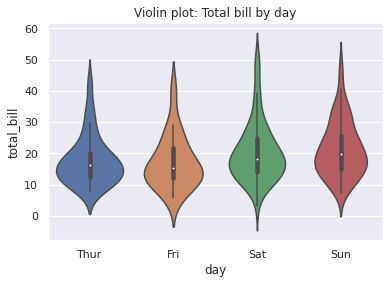

In [57]:

# Load a sample dataset
tips = sns.load_dataset('tips')
# Violin Plot
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin plot: Total bill by day')
plt.show()

# pair plot

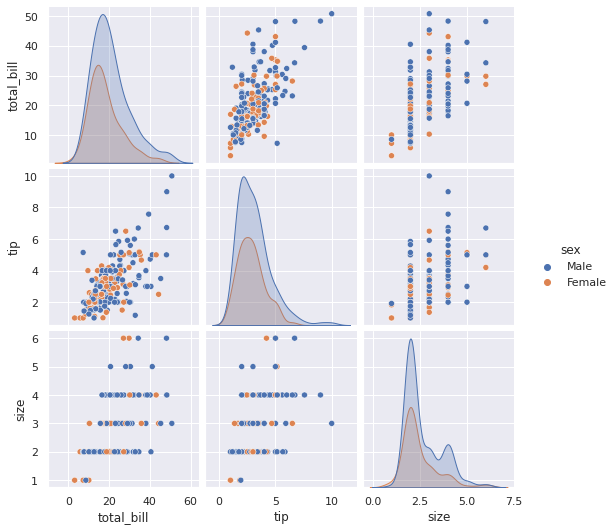

In [58]:
sns.pairplot(tips, hue="sex")

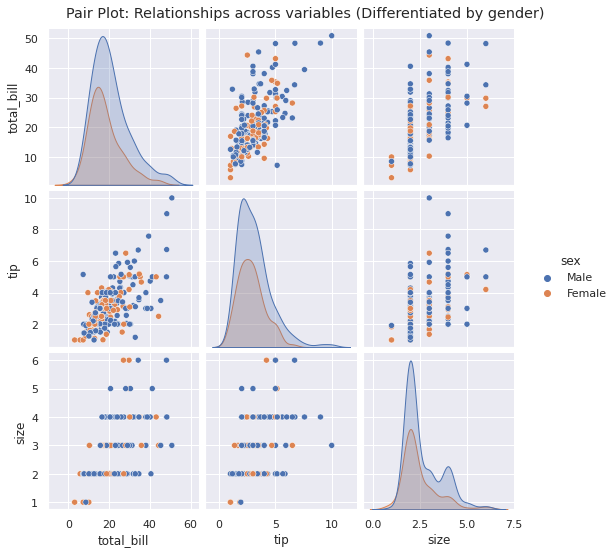

In [60]:

sns.pairplot(tips, hue='sex')
plt.suptitle('Pair Plot: Relationships across variables (Differentiated by gender)', y=1.02)
plt.show()

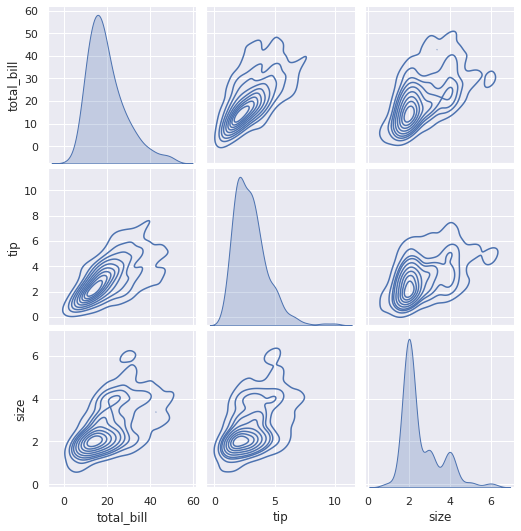

In [67]:
sns.pairplot(tips, kind="kde")
#The kind parameter determines both the diagonal and off-diagonal plotting style. Several options are available, including using kdeplot() to draw KDEs:

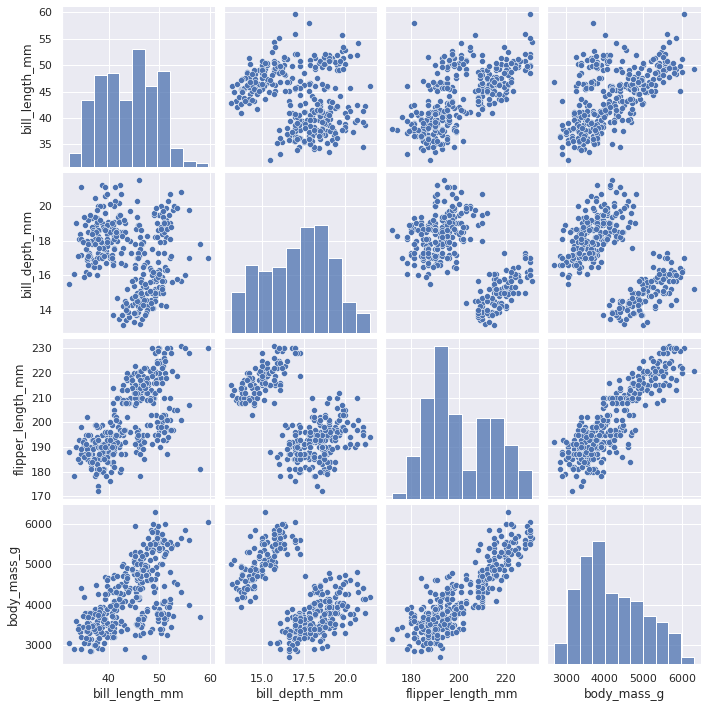

In [61]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

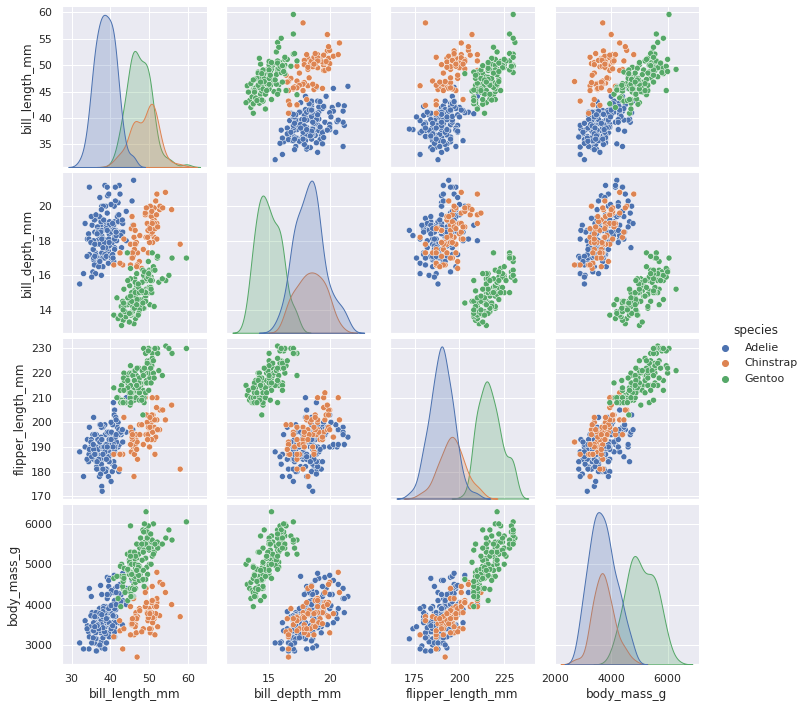

In [62]:
sns.pairplot(penguins, hue="species")

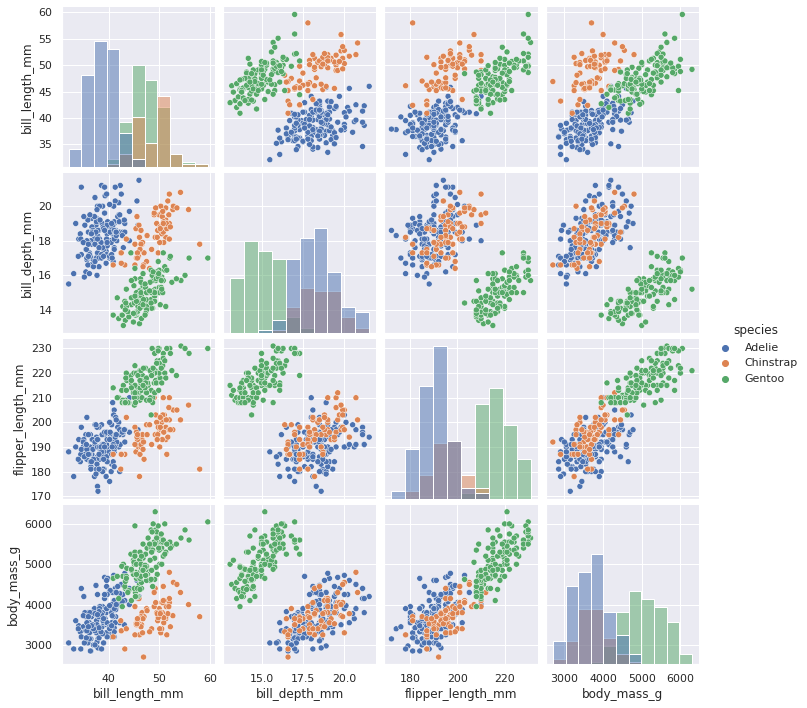

In [65]:
#It’s possible to force marginal histograms:
sns.pairplot(penguins, hue="species", diag_kind="hist")

# Heatmap

In [70]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
# correlations
iris.corr()

/tmp/ipykernel_366/4032990937.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


/tmp/ipykernel_366/3201496920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr())


<AxesSubplot: >

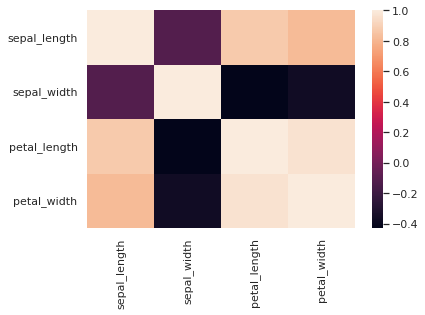

In [81]:
# heat to correlations
sns.heatmap(iris.corr())

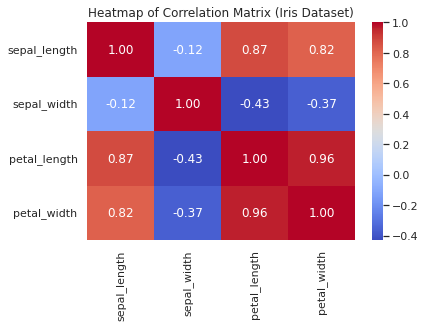

In [88]:
# heat to correlations with annotation, color map and format

correlation_matrix = iris.select_dtypes(include='number').corr()
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix (Iris Dataset)')
plt.show()

/tmp/ipykernel_366/1805980232.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  sns.heatmap(iris.drop(columns='species'), annot=iris.rank(axis="columns"))


<AxesSubplot: >

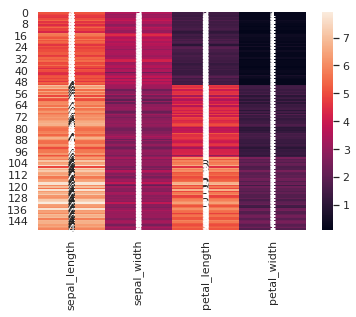

In [90]:
sns.heatmap(iris.drop(columns='species'), annot=iris.rank(axis="columns"))

<AxesSubplot: xlabel='Task', ylabel='Model'>

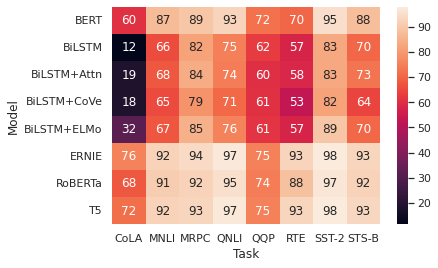

In [94]:
glue = sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
sns.heatmap(glue,annot=True)

In [92]:
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<AxesSubplot: xlabel='Task', ylabel='Model'>

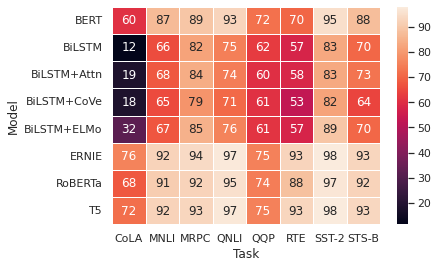

In [93]:
sns.heatmap(glue, annot=True, linewidth=.5)